In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

## Data Inspection

### Quantative fields
1. NA_Sales (North American Sales)
2. EU_Sales (European Sales)
3. JP_Sales (Japanese Sale)
4. Other Sales
5. Global Sales (Sum of all the sales, note: the sales are not influencing global sales but they are components of it)

### Qualitative/Categorical fields
1. Platform
2. Genre
3. Publisher

### Temporal field
1. Year (can be used as both categorical and quantitative based on the use case)

### Other observations
    the rank of each game is given according to Global Sales (Rank and Global_Sales have positive correlation, but as rank is an outcome of global_sales we can drop it as it does not help in predicting sales)
    
    the field to analyse or the output field is Global_Sales
    target of the analysis will be how the data fields are associated with global Sales, and popular market's Sales(NA, EU, JP)
    According to my understanding of the data and the following fields
    Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales
    We can use Platform, Genre and Publisher as they are associated with sales
    We can also track the rise and fall of Sales over the years
    
    Now what columns are of analytical value for explaining variation in Global_Sales
    1. Rank as it is an outcome of global_sales hence they do not directly help with our output
    it is a redundant column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Here the columns which contains the null values are
1. Year
2. Publisher

In [6]:
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 16598, Columns: 11


In [7]:
df['Year_Bin'] = (df['Year'] // 5) * 5
year_bin_sales = df.groupby('Year_Bin')['Global_Sales'].sum()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Year_Bin'>

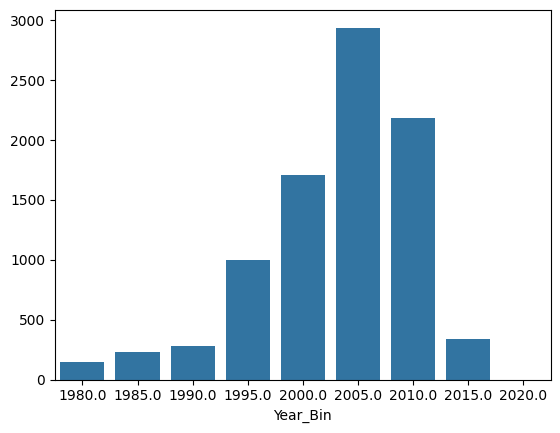

In [11]:
sns.barplot(x=year_bin_sales.index, y=year_bin_sales.values)

The global Sales of the games have been increasing from the times of 1980 to 2005, followed by an downfall in global sales till 2020

Note that this barplot is for the purpose of global sales varying over the period of time and does not help to distinguish the popularity of the game or games released per year to contribute towards global sales

In [13]:
df['Year_Bin'] = (df['Year'] // 5) * 5
year_bin_popularity = df.groupby('Year_Bin')['Global_Sales'].mean()

<Axes: xlabel='Year_Bin'>

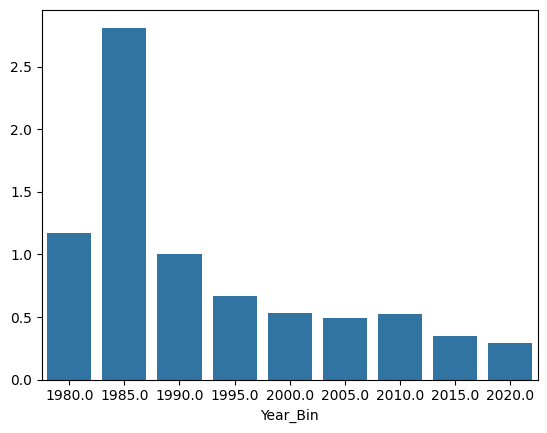

In [14]:
sns.barplot(x = year_bin_popularity.index, y= year_bin_popularity.values)

Now the mean is used to plot this bar graph to see the trend in global sales across the year

As we can derive from the graph the games release in the time period of 1982.5 to 1987.5 had more successfull individual games than any of the other years

and we can see from the trend that the individual popularity of the games is decreasing from 1990s to 2020

Despite lower total industry revenue in earlier years, the average game released during that period achieved higher sales, suggesting a more hit-driven or less saturated market

## Questions
Did average sales drop because:

Fewer hits?

Or too many games?

Or market fragmentation?

Now that we have seen that the game popularity has seen a downfall after 1985s
Now it's the time to explore the reasons for that by studying the driving factors for thr trends

Now as we have used mean to plot the barplot above showing the global sales trends, now we need to see if the lower bars are because of low number of games or few hits

In [28]:
yearly_stats = (
    df.groupby("Year")
      .agg(
          total_global_sales=("Global_Sales", "sum"),
          num_games_released=("Name", "count"),
          avg_sales_per_game=("Global_Sales", "mean"),
          median_sales_per_game=("Global_Sales", "median")
      )
      .reset_index()
)
yearly_stats.head()

,Year,total_global_sales,num_games_released,avg_sales_per_game,median_sales_per_game
0,1980.0,11.38,9,1.264444,0.770
1,1981.0,35.77,46,0.777609,0.465
2,1982.0,28.86,36,0.801667,0.540
3,1983.0,16.79,17,0.987647,0.770
4,1984.0,50.36,14,3.597143,1.485


In [31]:
yearly_stats["release_bin"] = pd.qcut(
    yearly_stats["num_games_released"],
    q=3,
    labels=["Low-release years", "Medium-release years", "High-release years"]
)
yearly_stats.head()

,Year,total_global_sales,num_games_released,avg_sales_per_game,median_sales_per_game,release_bin
0,1980.0,11.38,9,1.264444,0.770,Low-release years
1,1981.0,35.77,46,0.777609,0.465,Medium-release years
2,1982.0,28.86,36,0.801667,0.540,Low-release years
3,1983.0,16.79,17,0.987647,0.770,Low-release years
4,1984.0,50.36,14,3.597143,1.485,Low-release years


In [39]:
bin_analysis = (
    yearly_stats.groupby("release_bin")
    .agg(
        avg_total_sales=("total_global_sales", "mean"),
        avg_games_released=("num_games_released", "mean"),
        avg_sales_per_game=("avg_sales_per_game", "mean"),
        median_sales_per_game=("median_sales_per_game", "mean")
    )
)
bin_analysis.head()

C:\Users\prana\AppData\Local\Temp\ipykernel_9220\1935333702.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_stats.groupby("release_bin")


,avg_total_sales,avg_games_released,avg_sales_per_game,median_sales_per_game
release_bin,,,,
Low-release years,32.520769,16.923077,1.944306,0.934231
Medium-release years,169.625385,267.615385,0.722316,0.293462
High-release years,476.343077,971.384615,0.495180,0.157692


<Axes: xlabel='release_bin', ylabel='avg_sales_per_game'>

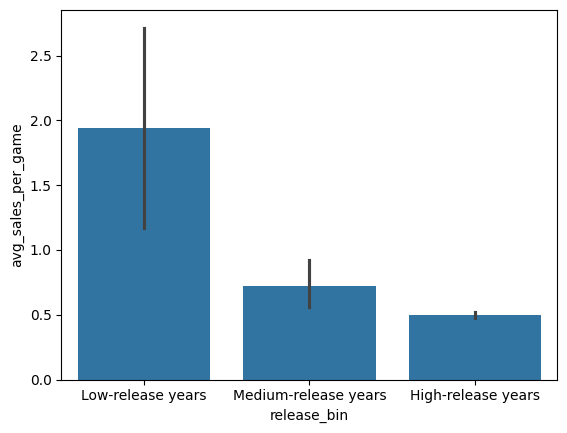

In [25]:
sns.barplot(
    data=yearly_stats,
    x="release_bin",
    y="avg_sales_per_game"
)


This suggests that sales are more concentrated among fewer titles in low-release years, whereas high-release years show greater market fragmentation

## Now let's Study about the Genre Popularity

My first question is what are the sales attracted by genres? as we are measuring things in terms of sales, my intuition says the hints to treasure will lie in that

<Axes: ylabel='Genre'>

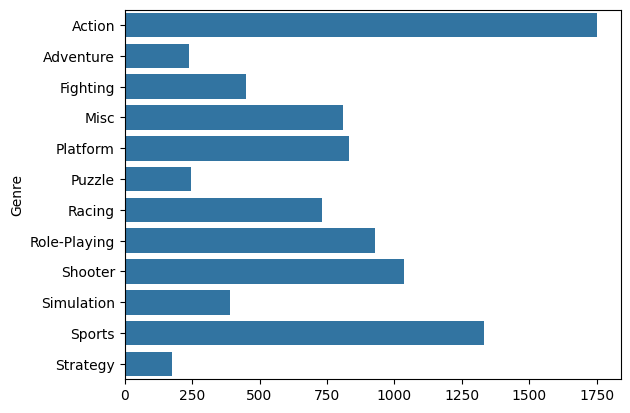

In [ ]:
sales_per_genre = df.groupby('Genre')['Global_Sales'].sum()
sns.barplot(y = sales_per_genre.index,  x= sales_per_genre.values)

From the bar plot we can observe that the Action and sports genre has attracted the most amount of sales

Now the question i was asking for was the global sales trend per genre

The question is answered via the plot created

Now what are the factors that are driving these sales?
1. Are we seeing high figures in Action or Sports or Role-playing or Shooter due to high amount of games released per genre or high popularity of the genres?

In [44]:
genre_df = (
    df.groupby('Genre').agg(
        sales_per_genre = ('Global_Sales', 'sum'),
        avg_sales_per_genre = ('Global_Sales', 'mean'),
        median_sales_per_genre = ('Global_Sales', 'median'),
        titles_per_genre = ('Name', 'count')
    ).reset_index()
)

genre_df.sort_values(by='sales_per_genre', ascending=False)

,Genre,sales_per_genre,avg_sales_per_genre,median_sales_per_genre,titles_per_genre
0,Action,1751.18,0.528100,0.190,3316
10,Sports,1330.93,0.567319,0.220,2346
8,Shooter,1037.37,0.791885,0.230,1310
7,Role-Playing,927.37,0.623233,0.185,1488
4,Platform,831.37,0.938341,0.280,886
3,Misc,809.96,0.465762,0.160,1739
6,Racing,732.04,0.586101,0.190,1249
2,Fighting,448.91,0.529375,0.210,848
9,Simulation,392.20,0.452364,0.160,867
5,Puzzle,244.95,0.420876,0.110,582


Now that we have view on genre's data, now we can get a metric of average sales of genre per title released

this metric will help us associate the popularity of genre with the global_sales

<Axes: xlabel='avg_sales_per_title', ylabel='Genre'>

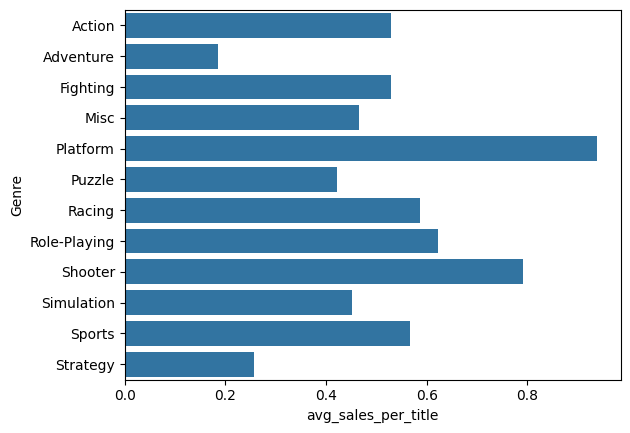

In [58]:
genre_df['avg_sales_per_title'] = genre_df['sales_per_genre']/genre_df['titles_per_genre']
sns.barplot(x = 'avg_sales_per_title', y='Genre', data=genre_df)

While Action is the highest-grossing genre in terms of total global sales, Platform games exhibit higher average sales per title

## Genre analysis on regional level (Japan)

In [59]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_Bin
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2005.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1985.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2005.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2005.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1995.0


In [61]:
Japan_genre_df = (
    df.groupby('Genre').agg(
        sales_per_genre = ('JP_Sales', 'sum'),
        avg_sales_per_genre = ('JP_Sales', 'mean'),
        median_sales_per_genre = ('JP_Sales', 'median'),
        titles_per_genre = ('Name', 'count')
    ).reset_index()
)

genre_df.sort_values(by='sales_per_genre', ascending=False).head()

,Genre,sales_per_genre,avg_sales_per_genre,median_sales_per_genre,titles_per_genre,avg_sales_per_title
0,Action,1751.18,0.528100,0.190,3316,0.528100
10,Sports,1330.93,0.567319,0.220,2346,0.567319
8,Shooter,1037.37,0.791885,0.230,1310,0.791885
7,Role-Playing,927.37,0.623233,0.185,1488,0.623233
4,Platform,831.37,0.938341,0.280,886,0.938341


As we can observe action, sports and shooter are still high grossing as they high sales in japan

<Axes: xlabel='avg_sales_per_title', ylabel='Genre'>

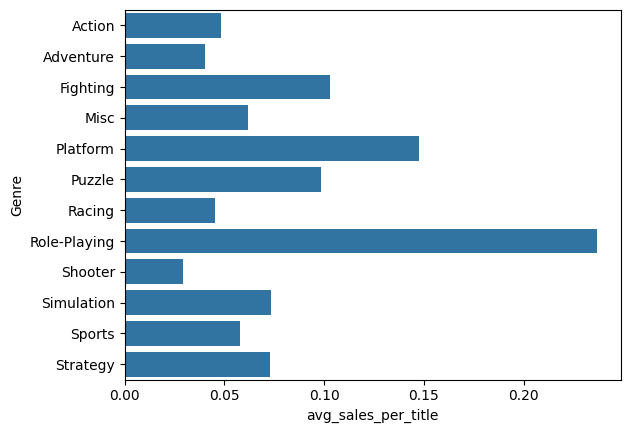

In [62]:
Japan_genre_df['avg_sales_per_title'] = Japan_genre_df['sales_per_genre']/Japan_genre_df['titles_per_genre']
sns.barplot(x = 'avg_sales_per_title', y='Genre', data=Japan_genre_df)

Here we can observe that in Japan the Role-playing titles have more sales per title as compared to other genres
While in previous analysis we observed that on the global scale Platform was had the most avergaes sales per title

Japan the genre platform has the second highest average sale per title while on global scale Role-playing is second highest in terms of average sales per title

### Interpretation:

In the Japanese market, Role-playing games exhibit the highest average sales per title among all genres. In contrast, our global analysis showed Platform games achieving the highest average sales per title. Notably, Platform ranks second in Japan, whereas Role-playing holds the second-highest position at the global level.

Platform Analysis

Text(0.5, 1.0, 'Total Sale on each Platform')

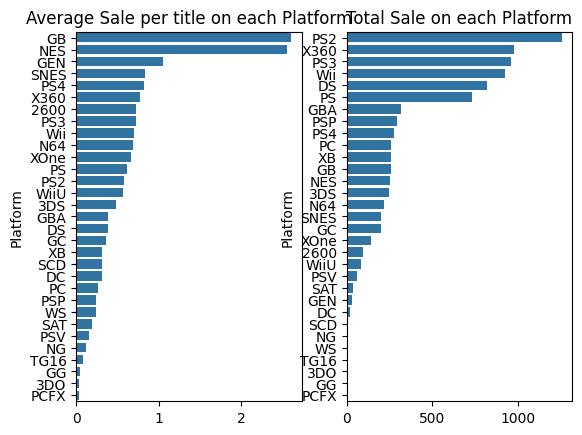

In [72]:
platform_avg_sales = df.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False)
plt.subplot(1, 2, 1)
sns.barplot(x = platform_avg_sales.values, y = platform_avg_sales.index)
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
plt.title('Average Sale per title on each Platform')
plt.subplot(1, 2, 2)
sns.barplot(x = platform_sales.values, y = platform_sales.index)
plt.title('Total Sale on each Platform')

Platforms like GB and NES show higher average sales per title, suggesting sales concentration among a smaller number of highly successful games.”

In contrast, platforms such as PS2, X360, PS3, and Wii dominate total global sales, indicating large catalogs and broad market participation.

Analyse Global_Sales vs Regional_sales

Text(0.5, 1.0, 'Total Sales by Platform and Region')

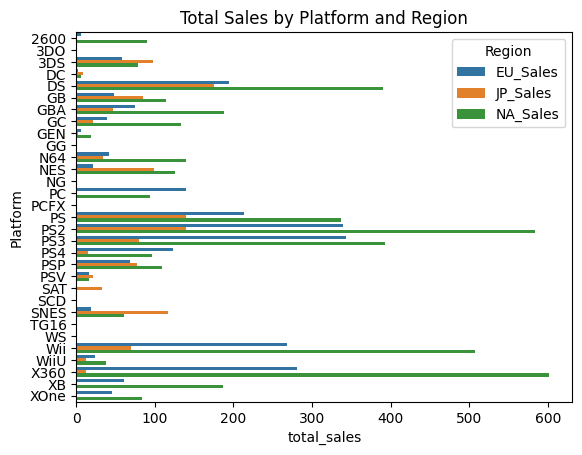

In [81]:
region_sales = df.melt(
    id_vars=["Platform", "Name"],
    value_vars=["NA_Sales", "EU_Sales", "JP_Sales"],
    var_name="Region",
    value_name="Sales"
)

platform_region_total = (
    region_sales.groupby(['Platform', 'Region'])['Sales'].sum().reset_index(name='total_sales')
)

sns.barplot(
    data = platform_region_total,
    x = 'total_sales',
    y = 'Platform',
    hue='Region'
)
plt.title("Total Sales by Platform and Region")